In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
POSIBLE_SETTINGS = [(1000, 6096), (100, 800), (30, 800), (100, 750), (500, 700), (3500, 100)]

In [3]:
def plot_cfg(ax: plt.Axes, tag: str, cfg_path: str):
    with open(cfg_path) as f:
        cfg = json.loads(f.read())
    positions = [[[], []] for _ in POSIBLE_SETTINGS]
    for layer in range(32):
        for head in range(32):
            head_cfg = cfg[layer][str(head)][1:3]
            for x, y in zip(POSIBLE_SETTINGS, positions):
                if head_cfg[0] == x[0] and head_cfg[1] == x[1]:
                    y[0].append(layer)
                    y[1].append(head)
    for i, y in enumerate(positions):
        ax.scatter(y[1], y[0], marker='s', color=f'C{i}')
    # ax.set_xlabel('head')
    # ax.set_ylabel('layer')
    ax.set_title(tag)

In [10]:
def plot_legend(ax: plt.Axes, loc: str):
    positions = [[[], []] for _ in POSIBLE_SETTINGS]
    for i, (x, y) in enumerate(zip(POSIBLE_SETTINGS, positions)):
        ax.scatter(y[1], y[0], marker='s', color=f'C{i}', label=f'v={x[0]}, s={x[1]}')
    ax.legend(loc=loc)
    ax.axis('off')

Text(0.5, 0.98, 'Phi-3 MInference Pattern Configurations')

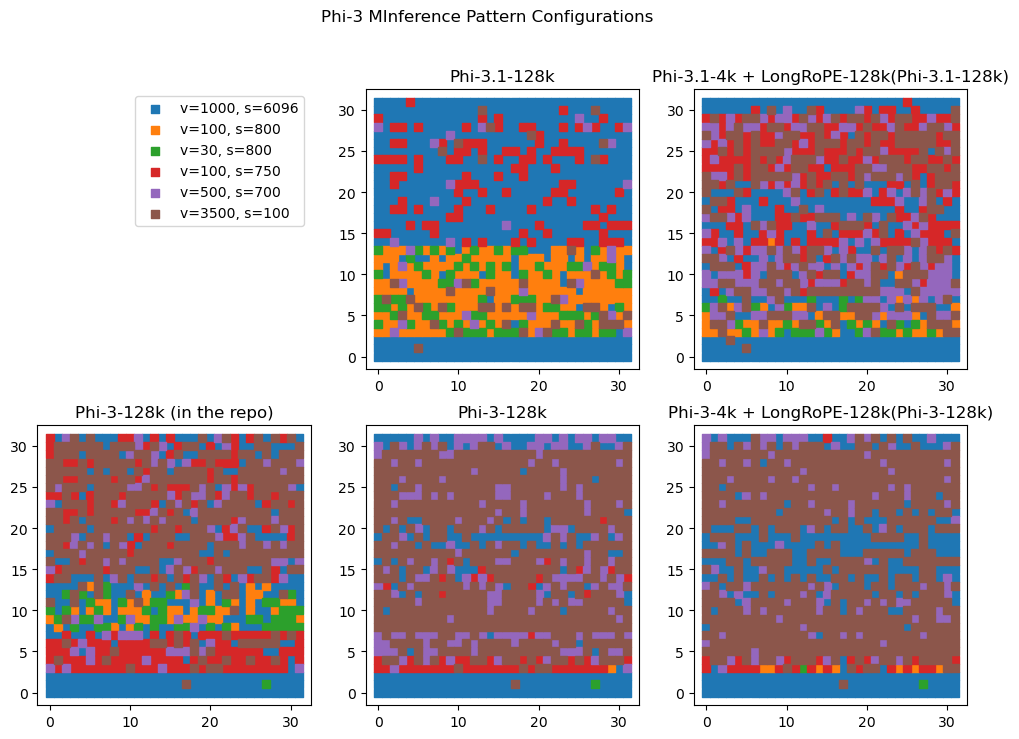

In [11]:
plt.figure(figsize=(12, 8))
plot_cfg(plt.subplot(234), 'Phi-3-128k (in the repo)', '/home/chengzhang/MInference/minference/configs/Phi_3_mini_128k_instruct_kv_out_v32_fit_o_best_pattern.json')
plot_cfg(plt.subplot(235), 'Phi-3-128k', '/home/chengzhang/MInference/experiments/infinite_bench/Phi-3-mini-128k-instruct-old.json')
plot_cfg(plt.subplot(232), 'Phi-3.1-128k', '/home/chengzhang/MInference/experiments/infinite_bench/Phi-3-mini-128k-instruct.json')
plot_cfg(plt.subplot(233), 'Phi-3.1-4k + LongRoPE-128k(Phi-3.1-128k)', '/home/chengzhang/MInference/experiments/infinite_bench/Phi-3-mini-4k-instruct-LongRoPE-128k.json')
# plot_cfg(plt.subplot(236), 'Phi-3.1-4k + LongRoPE-32k', '/home/chengzhang/MInference/experiments/infinite_bench/Phi-3-mini-4k-instruct-LongRoPE-32k.json')
plot_cfg(plt.subplot(236), 'Phi-3-4k + LongRoPE-128k(Phi-3-128k)', '/home/chengzhang/MInference/experiments/infinite_bench/Phi-3-mini-4k-instruct-old-LongRoPE-128k.json')
# plot_cfg(plt.subplot(236), '/home/chengzhang/MInference/experiments/infinite_bench/Phi-3-mini-4k-instruct.json')
plot_legend(plt.subplot(231), 'upper right')
plt.suptitle('Phi-3 MInference Pattern Configurations')